In [1]:
# Importing all the necessary modules to process our excel file
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import ExcelFile
from pandas import ExcelWriter
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")
%pwd

'C:\\Users\\Dr_Sam\\Desktop\\CHM SESSION JULY-NOV 2023\\WISDOM CLASS\\DATA SCIENCE-MACHINE LEARNING\\(WISDOM) Lecture 4 - ML Regressors Algorithms\\Lecture 3-Regressors (Tutor Folder)'

In [3]:
%pwd

'C:\\Users\\Dr_Sam\\Desktop\\CHM SESSION JULY-NOV 2023\\WISDOM CLASS\\DATA SCIENCE-MACHINE LEARNING\\(WISDOM) Lecture 4 - ML Regressors Algorithms\\Lecture 3-Regressors (Tutor Folder)'

In [4]:
# First task is to import the raw Excel file for processing purpose
filename = r'Final_PAH_Data_Teacher_v2.xlsx'

initial_df = pd.read_excel(filename,sheet_name='Sheet1',index_col=0,skiprows=0,usecols="A:P")
initial_df

,Lf(mm),Null1,Fuel,Prim_MH_to_MC,Prim_H_to_C,Null2,Mixture,Sec_H_to_C,Sec_fuel_Percent,MC_Sec_Fuel,Total_H_to_C,PAH,GRPAH,Experiments,Experiment_Num
S/No,,,,,,,,,,,,,,,
1,1.243198,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,696.493698,412.717406,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
2,1.759619,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,930.999998,495.480126,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
3,2.240685,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,1187.902926,572.576728,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
4,2.757107,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,1504.963994,655.339447,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
5,3.238173,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,1838.769810,732.436049,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,5.763478,CH4,16,0.333333,4.0,7% H2,2,10000,0.07,0.0,4.14,13.355160,6.625981,"Fuel: CH4, Mixture: 7% H2",Exp. 57
655,6.275610,CH4,16,0.333333,4.0,7% H2,2,10000,0.07,0.0,4.14,17.107886,8.029326,"Fuel: CH4, Mixture: 7% H2",Exp. 57
656,6.752386,CH4,16,0.333333,4.0,7% H2,2,10000,0.07,0.0,4.14,21.247527,9.335789,"Fuel: CH4, Mixture: 7% H2",Exp. 57


In [5]:
# Identifiying columns with Nan Values
for cols in initial_df.columns:
    print(f'\t{cols:<17}: {initial_df[cols].isna().sum()} NaN Values')

	Lf(mm)           : 0 NaN Values
	Null1            : 0 NaN Values
	Fuel             : 0 NaN Values
	Prim_MH_to_MC    : 0 NaN Values
	Prim_H_to_C      : 0 NaN Values
	Null2            : 0 NaN Values
	Mixture          : 0 NaN Values
	Sec_H_to_C       : 0 NaN Values
	Sec_fuel_Percent : 0 NaN Values
	MC_Sec_Fuel      : 0 NaN Values
	Total_H_to_C     : 0 NaN Values
	PAH              : 0 NaN Values
	GRPAH            : 0 NaN Values
	Experiments      : 0 NaN Values
	Experiment_Num   : 0 NaN Values


In [6]:
initial_df.columns

Index(['Lf(mm)', 'Null1', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 'Null2',
       'Mixture', 'Sec_H_to_C', 'Sec_fuel_Percent', 'MC_Sec_Fuel',
       'Total_H_to_C', 'PAH', 'GRPAH', 'Experiments', 'Experiment_Num'],
      dtype='object')

In [7]:
needed_df = initial_df[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C',
       'Mixture', 'MC_Sec_Fuel','Total_H_to_C', 'PAH','Experiments', 'Experiment_Num']]
needed_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH,Experiments,Experiment_Num
S/No,,,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493698,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
2,1.759619,28,0.166667,2.0,16,0.0,2.00,930.999998,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902926,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963994,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769810,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
...,...,...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160,"Fuel: CH4, Mixture: 7% H2",Exp. 57
655,6.275610,16,0.333333,4.0,2,0.0,4.14,17.107886,"Fuel: CH4, Mixture: 7% H2",Exp. 57
656,6.752386,16,0.333333,4.0,2,0.0,4.14,21.247527,"Fuel: CH4, Mixture: 7% H2",Exp. 57


In [8]:
# Printing out the Entire Raw Excel Data for confirmation
needed_df = pd.DataFrame(needed_df)
#df = df.apply(pd.to_numeric, errors='coerce')
needed_df = needed_df.fillna(0)

#df.at[0:12,7:11] = np.round(df.loc[0:12,7:11],3)
needed_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH,Experiments,Experiment_Num
S/No,,,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493698,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
2,1.759619,28,0.166667,2.0,16,0.0,2.00,930.999998,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902926,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963994,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769810,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
...,...,...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160,"Fuel: CH4, Mixture: 7% H2",Exp. 57
655,6.275610,16,0.333333,4.0,2,0.0,4.14,17.107886,"Fuel: CH4, Mixture: 7% H2",Exp. 57
656,6.752386,16,0.333333,4.0,2,0.0,4.14,21.247527,"Fuel: CH4, Mixture: 7% H2",Exp. 57


In [9]:
# Describe the Df
needed_df.describe()

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,4.635456,34.164134,0.208376,2.500507,9.340426,2.576900,2.812361,5144.381616
std,1.888055,8.568666,0.049455,0.593456,6.997036,3.149325,0.599230,10726.740271
min,1.243198,16.000000,0.166667,2.000000,2.000000,0.000000,2.000000,0.578278
25%,3.252817,28.000000,0.166667,2.000000,2.000000,0.000000,2.290000,140.442594
50%,4.756371,30.000000,0.166667,2.000000,16.000000,0.000000,2.830000,603.990562
75%,6.261701,42.000000,0.250000,3.000000,16.000000,5.400000,3.150000,3652.125250
max,7.769544,44.000000,0.333333,4.000000,16.000000,9.600000,4.400000,68329.872942


In [10]:
# Checking the datatypes
needed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 1 to 658
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lf(mm)          658 non-null    float64
 1   Fuel            658 non-null    int64  
 2   Prim_MH_to_MC   658 non-null    float64
 3   Prim_H_to_C     658 non-null    float64
 4   Mixture         658 non-null    int64  
 5   MC_Sec_Fuel     658 non-null    float64
 6   Total_H_to_C    658 non-null    float64
 7   PAH             658 non-null    float64
 8   Experiments     658 non-null    object 
 9   Experiment_Num  658 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 56.5+ KB


In [11]:
# Extracting the columns
list(needed_df.columns)

['Lf(mm)',
 'Fuel',
 'Prim_MH_to_MC',
 'Prim_H_to_C',
 'Mixture',
 'MC_Sec_Fuel',
 'Total_H_to_C',
 'PAH',
 'Experiments',
 'Experiment_Num']

In [12]:
# Assigning he appropriate Datatypes
int_list = ['Fuel','Mixture']
for column in int_list:
    needed_df[column] = needed_df[column].astype('int16')
    
float_list = ['Lf(mm)','Prim_MH_to_MC','Prim_H_to_C','MC_Sec_Fuel','Total_H_to_C','PAH']
for column in float_list:
    needed_df[column] = needed_df[column].astype('float32')

category_list = ['Experiments','Experiment_Num']
for column in category_list:
    needed_df[column] = needed_df[column].astype('category')
    
needed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 1 to 658
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Lf(mm)          658 non-null    float32 
 1   Fuel            658 non-null    int16   
 2   Prim_MH_to_MC   658 non-null    float32 
 3   Prim_H_to_C     658 non-null    float32 
 4   Mixture         658 non-null    int16   
 5   MC_Sec_Fuel     658 non-null    float32 
 6   Total_H_to_C    658 non-null    float32 
 7   PAH             658 non-null    float32 
 8   Experiments     658 non-null    category
 9   Experiment_Num  658 non-null    category
dtypes: category(2), float32(6), int16(2)
memory usage: 29.4 KB


In [13]:
# Descriptions of the target column
needed_df["PAH"].describe()

count      658.000000
mean      5144.381348
std      10726.740234
min          0.578278
25%        140.442596
50%        603.990570
75%       3652.125305
max      68329.875000
Name: PAH, dtype: float64

In [14]:
# To find the correlation among
# the columns using pearson method
needed_df.corr(method ='pearson')

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
Lf(mm),1.000000,-0.035710,0.113368,0.113368,-0.174055,-0.138855,0.103584,0.264378
Fuel,-0.035710,1.000000,-0.430037,-0.430037,0.133413,0.024778,-0.461671,0.343496
Prim_MH_to_MC,0.113368,-0.430037,1.000000,1.000000,-0.104386,-0.051028,0.898047,-0.385709
Prim_H_to_C,0.113368,-0.430037,1.000000,1.000000,-0.104386,-0.051028,0.898047,-0.385709
Mixture,-0.174055,0.133413,-0.104386,-0.104386,1.000000,0.779961,0.023220,-0.022269
MC_Sec_Fuel,-0.138855,0.024778,-0.051028,-0.051028,0.779961,1.000000,0.242672,-0.142470
Total_H_to_C,0.103584,-0.461671,0.898047,0.898047,0.023220,0.242672,1.000000,-0.472044
PAH,0.264378,0.343496,-0.385709,-0.385709,-0.022269,-0.142470,-0.472044,1.000000


In [15]:
# To find the correlation among
# the columns using kendall method
needed_df.corr(method ='kendall')

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
Lf(mm),1.000000,-0.010749,0.056950,0.056950,-0.148113,-0.111276,0.048764,0.190991
Fuel,-0.010749,1.000000,0.005870,0.005870,0.121702,0.033828,-0.065779,0.158192
Prim_MH_to_MC,0.056950,0.005870,1.000000,1.000000,-0.008658,0.031179,0.744296,-0.639414
Prim_H_to_C,0.056950,0.005870,1.000000,1.000000,-0.008658,0.031179,0.744296,-0.639414
Mixture,-0.148113,0.121702,-0.008658,-0.008658,1.000000,0.733017,0.092638,0.039856
MC_Sec_Fuel,-0.111276,0.033828,0.031179,0.031179,0.733017,1.000000,0.283041,-0.070198
Total_H_to_C,0.048764,-0.065779,0.744296,0.744296,0.092638,0.283041,1.000000,-0.637223
PAH,0.190991,0.158192,-0.639414,-0.639414,0.039856,-0.070198,-0.637223,1.000000


In [16]:
needed_df.columns

Index(['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 'Mixture',
       'MC_Sec_Fuel', 'Total_H_to_C', 'PAH', 'Experiments', 'Experiment_Num'],
      dtype='object')

In [17]:
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [18]:
data_df = needed_df.copy()
data_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH,Experiments,Experiment_Num
S/No,,,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493713,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
2,1.759619,28,0.166667,2.0,16,0.0,2.00,931.000000,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902954,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963989,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769775,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
...,...,...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160,"Fuel: CH4, Mixture: 7% H2",Exp. 57
655,6.275609,16,0.333333,4.0,2,0.0,4.14,17.107885,"Fuel: CH4, Mixture: 7% H2",Exp. 57
656,6.752387,16,0.333333,4.0,2,0.0,4.14,21.247526,"Fuel: CH4, Mixture: 7% H2",Exp. 57


In [19]:
## Understanding which features are very important for prediction

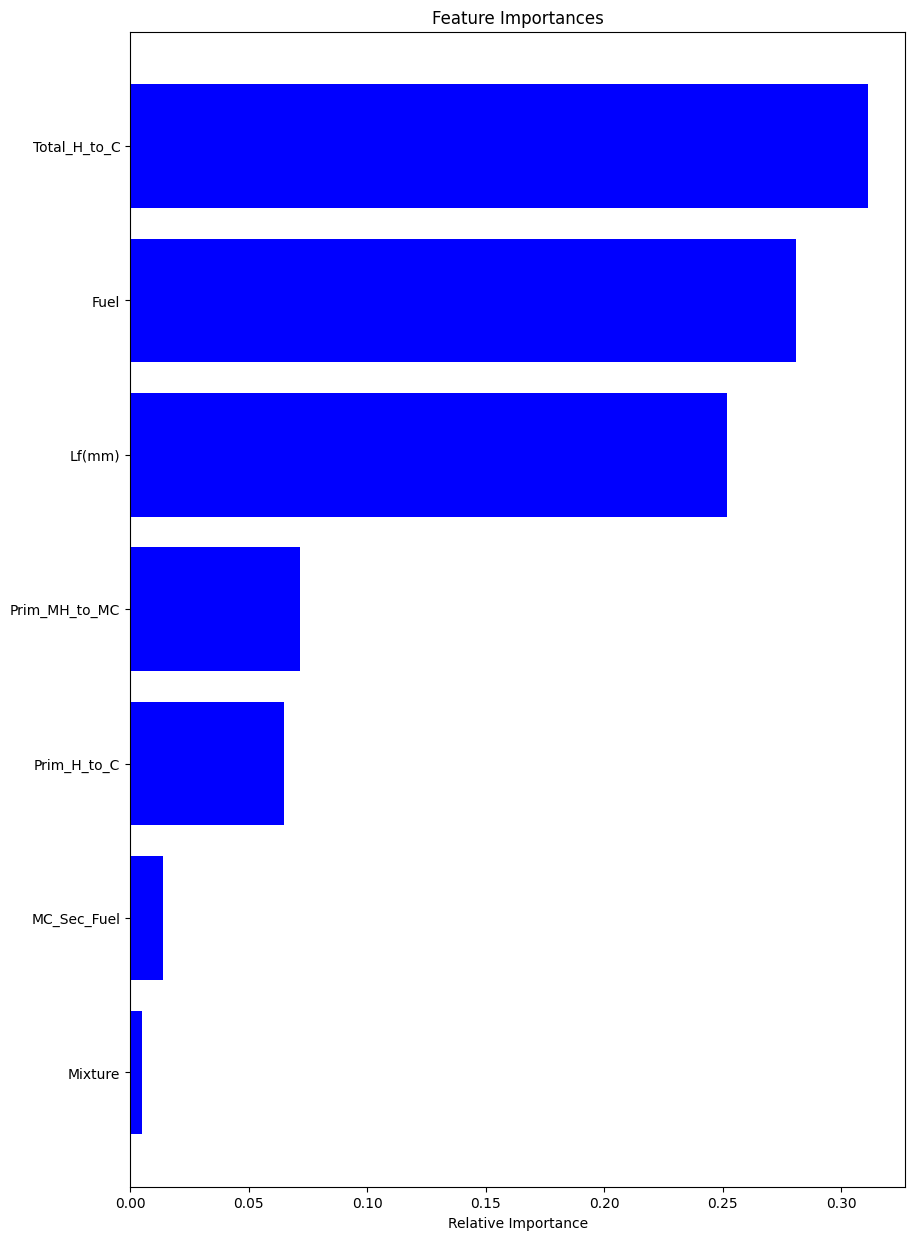

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import train_test_split
# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(
                                        data_df.drop(['PAH', 'Experiments', 'Experiment_Num'], axis=1), data_df['PAH'], test_size=0.20, random_state=0)
# fitting the model
model = ExtraTreesRegressor(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# plotting feature importances
features = data_df.drop('PAH', axis = 1).columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [21]:
data_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH,Experiments,Experiment_Num
S/No,,,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493713,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
2,1.759619,28,0.166667,2.0,16,0.0,2.00,931.000000,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902954,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963989,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769775,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
...,...,...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160,"Fuel: CH4, Mixture: 7% H2",Exp. 57
655,6.275609,16,0.333333,4.0,2,0.0,4.14,17.107885,"Fuel: CH4, Mixture: 7% H2",Exp. 57
656,6.752387,16,0.333333,4.0,2,0.0,4.14,21.247526,"Fuel: CH4, Mixture: 7% H2",Exp. 57


In [23]:
# Extracting the columns for machine learning application
data_dfX = data_df.drop(columns=["Experiments","Experiment_Num"])
data_dfX

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
S/No,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493713
2,1.759619,28,0.166667,2.0,16,0.0,2.00,931.000000
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902954
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963989
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769775
...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160
655,6.275609,16,0.333333,4.0,2,0.0,4.14,17.107885
656,6.752387,16,0.333333,4.0,2,0.0,4.14,21.247526


In [24]:
#train_X, test_X, train_y, test_y = train_test_split(data_dfX, data_df['PAH'],test_size=0.3,random_state=0)

In [113]:
# Deriving the model equation

train_data = data_dfX[0:441].copy()
train_data

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
S/No,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.000000,696.493713
2,1.759619,28,0.166667,2.0,16,0.0,2.000000,931.000000
3,2.240685,28,0.166667,2.0,16,0.0,2.000000,1187.902954
4,2.757107,28,0.166667,2.0,16,0.0,2.000000,1504.963989
5,3.238173,28,0.166667,2.0,16,0.0,2.000000,1838.769775
...,...,...,...,...,...,...,...,...
437,4.239950,30,0.250000,3.0,16,7.2,3.428571,258.594299
438,4.756371,30,0.250000,3.0,16,7.2,3.428571,328.329987
439,5.247792,30,0.250000,3.0,16,7.2,3.428571,402.711731


In [114]:
#data_df['Fuel'] = np.log10(data_df['Fuel'])

In [115]:
# Deriving the model equation

test_data = data_dfX[441:658].copy()
test_data

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
S/No,,,,,,,,
442,1.243198,28,0.166667,2.0,2,0.0,2.00,655.583374
443,1.759619,28,0.166667,2.0,2,0.0,2.00,884.130371
444,2.265685,28,0.166667,2.0,2,0.0,2.00,1145.398193
445,2.746752,28,0.166667,2.0,2,0.0,2.00,1427.994019
446,3.263173,28,0.166667,2.0,2,0.0,2.00,1768.495117
...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160
655,6.275609,16,0.333333,4.0,2,0.0,4.14,17.107885
656,6.752387,16,0.333333,4.0,2,0.0,4.14,21.247526


In [116]:
#reg.score(test_X,test_y)

In [117]:
## Runing all the available regressors on the train and test

In [118]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score,max_error

In [129]:
from time import time

from sklearn.linear_model import LinearRegression, RANSACRegressor,Ridge,Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor 
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [130]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
regressors = [
    SGDRegressor(),
    RANSACRegressor(),
    KNeighborsRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    ExtraTreesRegressor(),
    BaggingRegressor(estimator=ExtraTreesRegressor()),
    GradientBoostingRegressor(learning_rate=0.3),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    BaggingRegressor(estimator=RandomForestRegressor()),
    GradientBoostingRegressor(),
    BaggingRegressor(estimator=GradientBoostingRegressor()),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    VotingRegressor([("gb", reg1), ("rf", reg2)])
    
]

In [131]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import MaxAbsScaler, Normalizer, PowerTransformer, QuantileTransformer  
from sklearn.compose import TransformedTargetRegressor
scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    MaxAbsScaler()
]

In [141]:
# Create a dataframe to store the model training performance
perf_index = 0
performance_df = pd.DataFrame(columns= ['train_time','pred_time','train_score','test_score',"ml_model"])

In [142]:
# Creating empty dataframe for storage
output_df = pd.DataFrame()

#Scaling the training data
scal_traindf = pd.DataFrame()

#Scaling the test data
scal_testdf = pd.DataFrame()

In [143]:
# Extracting the column headers
print(list(test_data.columns))

['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C', 'PAH']


In [154]:
head = len(regressors)

for scaler in scalers:
    # Performing the necessary scaling of the training data (Only need to use the fit_transform() function)
    scal_traindf[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                   'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C', 'PAH']] = scaler.fit_transform(
                                                        train_data[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                                                        'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C', 'PAH']]) # training data
    
    # Creating the x features  and y values for training data
    scalX_traindf = scal_traindf[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                   'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C']]
    scaly_traindf = scal_traindf['PAH']
    
    # Performing the scaling of the test data (Only need to use the transform() function)
    scal_testdf[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                   'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C', 'PAH']] = scaler.transform(
                                                        test_data[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                                                        'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C', 'PAH']]) # training data
    
    # Creating the x features  and y values for test data
    scalX_testdf = scal_testdf[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                   'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C']]
    scaly_testdf = scal_testdf['PAH']
    
    print(scaler)
    
    for model in regressors[:head]:
        start = time() # Training time started
        
        #Create regression object using scaled data
        scale_model = TransformedTargetRegressor(regressor=model, transformer=scaler)
        scale_model.fit(scalX_traindf, scaly_traindf)
        train_time = time() - start # Training time ended
        train_score = scale_model.score(scalX_traindf, scaly_traindf)
        
        start = time() # Prediction time started for training data
        scal_traindf['y_predict'] = scale_model.predict(scalX_traindf)
        predict_time = time()-start # Prediction time ended
        
        # Transforming the training data back to actual values
        output_df[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                   'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C','pred_PAH']] = np.round(scaler.inverse_transform(
                                                scal_traindf[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                                                            'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C','y_predict']]),2)
    
    
        # mx
        mx = float(80/100)
        start_time = time()
        for num in range(10):
            scale_y_pred = scale_model.predict(scalX_testdf)
            test_score = r2_score(scaly_testdf, scale_y_pred)
            if(test_score > mx):
                mx = test_score
                #print(f'test score: {mx}')
        predict_time = time()-start 
        scal_testdf['y_predict'] = scale_model.predict(scalX_testdf) # actual test data
        
        # Transforming the test data back to actual value
        test_df[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                   'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C','pred_PAH']] = np.round(
                                    scaler.inverse_transform(scal_testdf[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                                           'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C','y_predict']]))
                           
        #test_pred = test_df['pred_price']
        #print(f'Actual value: {test_y.values[0]}, Predicted value: {test_pred.values[0]}')
       
        if(test_score>0.97):
            print(scale_model)
            print("\tTraining time: %0.3fs" % train_time)
            print("\tPrediction time: %0.3fs" % predict_time)
            print("\tR2 training score: %0.4f" % train_score)
            print("\tR2 test score: %0.4f" %test_score)
        
        performance_df.loc[perf_index] = [train_time,predict_time,train_score,test_score,(scale_model)]
        perf_index +=1
        
    print()
print('Simulation Completed')


StandardScaler()
TransformedTargetRegressor(regressor=ExtraTreesRegressor(),
                           transformer=StandardScaler())
	Training time: 0.248s
	Prediction time: 0.193s
	R2 training score: 1.0000
	R2 test score: 0.9781
TransformedTargetRegressor(regressor=BaggingRegressor(estimator=ExtraTreesRegressor()),
                           transformer=StandardScaler())
	Training time: 2.279s
	Prediction time: 1.384s
	R2 training score: 0.9992
	R2 test score: 0.9781

MinMaxScaler()
TransformedTargetRegressor(regressor=ExtraTreesRegressor(),
                           transformer=MinMaxScaler())
	Training time: 0.279s
	Prediction time: 0.188s
	R2 training score: 1.0000
	R2 test score: 0.9771
TransformedTargetRegressor(regressor=BaggingRegressor(estimator=ExtraTreesRegressor()),
                           transformer=MinMaxScaler())
	Training time: 2.292s
	Prediction time: 1.390s
	R2 training score: 0.9996
	R2 test score: 0.9826

RobustScaler()
TransformedTargetRegressor(regressor=Ex

In [155]:
# Sorting the model performance by train score and test score
performance_df.sort_values(by=['test_score','train_score',], ascending=False).head(30)

,train_time,pred_time,train_score,test_score,ml_model
388,2.196755,1.463345,0.998885,0.983040,TransformedTargetRegressor(regressor=BaggingRe...
177,2.069529,1.404924,0.999281,0.982907,TransformedTargetRegressor(regressor=BaggingRe...
211,2.146859,1.448788,0.999126,0.982761,TransformedTargetRegressor(regressor=BaggingRe...
57,0.219368,0.171875,1.000000,0.982744,TransformedTargetRegressor(regressor=ExtraTree...
370,0.212463,0.157866,1.000000,0.982706,TransformedTargetRegressor(regressor=ExtraTree...
7,2.093978,1.393708,0.998565,0.982672,TransformedTargetRegressor(regressor=BaggingRe...
109,2.275026,1.360938,0.999399,0.982661,TransformedTargetRegressor(regressor=BaggingRe...
422,2.292052,1.389665,0.999582,0.982586,TransformedTargetRegressor(regressor=BaggingRe...
91,0.242146,0.155591,1.000000,0.982501,TransformedTargetRegressor(regressor=ExtraTree...
75,2.089450,1.413720,0.999491,0.982239,TransformedTargetRegressor(regressor=BaggingRe...


In [156]:
good_model = performance_df['ml_model'].iloc[211]
good_model

'TransformedTargetRegressor(regressor=BaggingRegressor(estimator=ExtraTreesRegressor()),\n                           transformer=StandardScaler())'

In [173]:
# Create a dataframe to store the model training performance
perf_index = 0
best_performance_df = pd.DataFrame(columns= ['train_time','pred_time','train_score','test_score',"ml_model"])

In [174]:
# Testing the limilt

head = len(regressors)

for scaler in scalers:
    # Performing the necessary scaling of the training data (Only need to use the fit_transform() function)
    scal_traindf[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                   'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C', 'PAH']] = scaler.fit_transform(
                                                        train_data[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                                                        'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C', 'PAH']]) # training data
    
    # Creating the x features  and y values for training data
    scalX_traindf = scal_traindf[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                   'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C']]
    scaly_traindf = scal_traindf['PAH']
    
    # Performing the scaling of the test data (Only need to use the transform() function)
    scal_testdf[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                   'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C', 'PAH']] = scaler.transform(
                                                        test_data[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                                                        'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C', 'PAH']]) # training data
    
    # Creating the x features  and y values for test data
    scalX_testdf = scal_testdf[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                   'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C']]
    scaly_testdf = scal_testdf['PAH']
    
    print(scaler)
    
    for model in regressors[:head]:
        start = time() # Training time started
        
        #Create regression object using scaled data
        scale_model = TransformedTargetRegressor(regressor=model, transformer=scaler)
        scale_model.fit(scalX_traindf, scaly_traindf)
        train_time = time() - start # Training time ended
        train_score = scale_model.score(scalX_traindf, scaly_traindf)
        
        start = time() # Prediction time started for training data
        scal_traindf['y_predict'] = scale_model.predict(scalX_traindf)
        predict_time = time()-start # Prediction time ended
        
        # Transforming the training data back to actual values
        output_df[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                   'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C','pred_PAH']] = np.round(scaler.inverse_transform(
                                                scal_traindf[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                                                            'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C','y_predict']]),2)
    
    
        # mx
        mx = float(981/1000)
        start_time = time()
        for num in range(100):
            scale_y_pred = scale_model.predict(scalX_testdf)
            test_score = r2_score(scaly_testdf, scale_y_pred)
            if(test_score < 0.98):
                break
            if(test_score > mx):
                mx = test_score
                #print(f'test score: {mx}')
        predict_time = time()-start 
        scal_testdf['y_predict'] = scale_model.predict(scalX_testdf) # actual test data
        
        # Transforming the test data back to actual value
        test_df[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                   'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C','pred_PAH']] = np.round(
                                    scaler.inverse_transform(scal_testdf[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 
                                           'Mixture', 'MC_Sec_Fuel', 'Total_H_to_C','y_predict']]))
                           
        #test_pred = test_df['pred_price']
        #print(f'Actual value: {test_y.values[0]}, Predicted value: {test_pred.values[0]}')
       
        if(test_score>0.98):
            print(scale_model)
            print("\tTraining time: %0.3fs" % train_time)
            print("\tPrediction time: %0.3fs" % predict_time)
            print("\tR2 training score: %0.4f" % train_score)
            print("\tR2 test score: %0.4f" %test_score)
        
            best_performance_df.loc[perf_index] = [train_time,predict_time,train_score,test_score,(scale_model)]
            perf_index +=1
        
    print()
print('Simulation Completed')

StandardScaler()
TransformedTargetRegressor(regressor=ExtraTreesRegressor(),
                           transformer=StandardScaler())
	Training time: 0.204s
	Prediction time: 1.832s
	R2 training score: 1.0000
	R2 test score: 0.9843
TransformedTargetRegressor(regressor=BaggingRegressor(estimator=ExtraTreesRegressor()),
                           transformer=StandardScaler())
	Training time: 2.364s
	Prediction time: 12.383s
	R2 training score: 0.9993
	R2 test score: 0.9804

MinMaxScaler()
TransformedTargetRegressor(regressor=BaggingRegressor(estimator=ExtraTreesRegressor()),
                           transformer=MinMaxScaler())
	Training time: 2.099s
	Prediction time: 12.359s
	R2 training score: 0.9990
	R2 test score: 0.9827

RobustScaler()
TransformedTargetRegressor(regressor=BaggingRegressor(estimator=ExtraTreesRegressor()),
                           transformer=RobustScaler())
	Training time: 2.176s
	Prediction time: 12.896s
	R2 training score: 0.9995
	R2 test score: 0.9802

MaxAbsS

In [175]:
# Sorting the model performance by train score and test score
best_performance_df.sort_values(by=['test_score','train_score',], ascending=False)

,train_time,pred_time,train_score,test_score,ml_model
0,0.203979,1.831735,1.000000,0.984308,TransformedTargetRegressor(regressor=ExtraTree...
2,2.098523,12.359126,0.999018,0.982657,TransformedTargetRegressor(regressor=BaggingRe...
1,2.363558,12.383098,0.999284,0.980395,TransformedTargetRegressor(regressor=BaggingRe...
3,2.176405,12.896008,0.999475,0.980198,TransformedTargetRegressor(regressor=BaggingRe...


In [ ]:
# Runing iterations to get best R2 score
param=[]
best_regress = ExtraTreesRegressor(n_jobs=-1,random_state=None)
best_mx = float(980/1000)

while(best_mx <= 0.986):
    start = time()
    best_regress.fit(train_X,train_y)
    train_time = time() - start
    start = time()
    y_pred = best_regress.predict(test_X)
    test_score = r2_score(test_y, y_pred)
    # print(test_score)
    if(test_score > best_mx):
        best_mx = test_score
        print(best_mx)
    predict_time = time()-start 

print(best_regress)
print("\tTraining time= %0.3fs" % train_time)
print("\tPrediction time= %0.3fs" % predict_time)
print("\tExplained variance=", explained_variance_score(test_y, y_pred))
print("\tMean absolute error=", mean_absolute_error(test_y, y_pred))
print("\tMean squared error=", mean_squared_error(test_y,y_pred))
print("\tR2 training score=", best_regress.score(train_X, train_y))
#rint("\tR2 test score=", r2_score(test_y, y_pred))
print("\tR2 test score=", best_mx)
print("\tR2 Maximum Error:", max_error(test_y, y_pred))

print()



In [ ]:
best_regress.get_params(deep=True)

In [ ]:
best_score = str(round(best_mx*10000))
best_score

In [ ]:
import pickle

# Saving the best regressor as a pickle file
best_score = str(round(best_mx*10000))
model_name = "best_regress_" + best_score +".pkl"
pickle.dump(best_regress, open(model_name, 'wb')) # stored as binary file
model_name

In [ ]:
import pickle

# Importing the best regressor as a pickle file
model_name = 'best_regress_9865.pkl'
pickled_model = pickle.load(open(model_name, 'rb')) # read as binary file


In [ ]:
test_X

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
test_X['PAH'] = test_y
test_X['Pred_PAH'] = y_pred
test_X

In [ ]:
# Plotting Graphs for Methane(CH4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][0:14]
y_actual = test_X['PAH'][0:14]
y_pred = test_X['Pred_PAH'][0:14]

axes.set_title('CH4 with 0% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()




In [ ]:
# Plotting Graphs for Propene(C3H8) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][14:28]
y_actual = test_X['PAH'][14:28]
y_pred = test_X['Pred_PAH'][14:28]

axes.set_title('C3H6 with 10% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][28:42]
y_actual = test_X['PAH'][28:42]
y_pred = test_X['Pred_PAH'][28:42]

axes.set_title('C2H4 with 20% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][42:56]
y_actual = test_X['PAH'][42:56]
y_pred = test_X['Pred_PAH'][42:56]

axes.set_title('C3H6 with 30% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][56:70]
y_actual = test_X['PAH'][56:70]
y_pred = test_X['Pred_PAH'][56:70]

axes.set_title('C3H6 with 45% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][70:84]
y_actual = test_X['PAH'][70:84]
y_pred = test_X['Pred_PAH'][70:84]

axes.set_title('C3H6 with 45% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][84:97]
y_actual = test_X['PAH'][84:97]
y_pred = test_X['Pred_PAH'][84:97]

axes.set_title('C2H4 with 33% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][84:98]
y_actual = test_X['PAH'][84:98]
y_pred = test_X['Pred_PAH'][84:98]

axes.set_title('C2H4 with 33% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][98:108]
y_actual = test_X['PAH'][98:108]
y_pred = test_X['Pred_PAH'][98:108]

axes.set_title('C3H8 with 0% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][108:118]
y_actual = test_X['PAH'][108:118]
y_pred = test_X['Pred_PAH'][108:118]

axes.set_title('C3H8 with 20% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][118:132]
y_actual = test_X['PAH'][118:132]
y_pred = test_X['Pred_PAH'][118:132]

axes.set_title('C3H8 with 45% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][132:146]
y_actual = test_X['PAH'][132:146]
y_pred = test_X['Pred_PAH'][132:146]

axes.set_title('C3H8 with 50% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][146:157]
y_actual = test_X['PAH'][146:157]
y_pred = test_X['Pred_PAH'][146:157]

axes.set_title('C2H6 with 0% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][157:171]
y_actual = test_X['PAH'][157:171]
y_pred = test_X['Pred_PAH'][157:171]

axes.set_title('C2H4 with 70% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][171:182]
y_actual = test_X['PAH'][171:182]
y_pred = test_X['Pred_PAH'][171:182]

axes.set_title('C2H6 with 40% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][182:189]
y_actual = test_X['PAH'][182:189]
y_pred = test_X['Pred_PAH'][182:189]

axes.set_title('C2H6 with 27% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][189:199]
y_actual = test_X['PAH'][189:199]
y_pred = test_X['Pred_PAH'][189:199]

axes.set_title('C2H6 with 80% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Plotting Graphs for Methane(CH4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][199:208]
y_actual = test_X['PAH'][199:208]
y_pred = test_X['Pred_PAH'][199:208]

axes.set_title('CH4 with 0% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()




In [ ]:
# Plotting Graphs for Methane(CH4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][208:217]
y_actual = test_X['PAH'][208:217]
y_pred = test_X['Pred_PAH'][208:217]

axes.set_title('CH4 with 7% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()


In [ ]:
#Getting the entire dataframe of the test features
test_X

In [ ]:
# Extracting the column headings of the test dataframe
list(test_X.columns)

In [ ]:
# Creating an empty dataframe for combining the output
test_output_df = pd.DataFrame()

In [ ]:
test_output_df[['Lf(mm)','Prim_MH_to_MC','MC_Sec_Fuel']] = (test_X[['Lf(mm)','Prim_MH_to_MC','MC_Sec_Fuel']]) 

# Reversing the log of (pah, pred_pah)/10
test_output_df[['PAH','Pred_PAH']] = np.power(10,(test_X[['PAH','Pred_PAH']]*10))

# Reversing the log of 'Fuel', and 'Total_H_to_C'
test_output_df[['Fuel', 'Total_H_to_C']] = np.power(10,(test_X[['Fuel', 'Total_H_to_C']]))
test_output_df[["Lf(mm)",'Fuel', 'Prim_MH_to_MC','MC_Sec_Fuel','Total_H_to_C','PAH','Pred_PAH']]

In [ ]:
# Exporting Results
test_output_df.to_excel('Initial_PAH_Test_Results.xlsx')